In [3]:
import pandas as pd

In [ ]:
data = pd.read_csv('heart.csv')
df = pd.DataFrame(data)

# Taking Care of Duplicates and missing values in Dataset

In [ ]:
data_dup = df.duplicated().any()

In [ ]:
data_dup


In [ ]:
df.drop_duplicates()

In [ ]:
data.isnull().sum()
df=df.drop_duplicates()

In [ ]:
data_dup = df.duplicated().any()

In [ ]:
data_dup

In [ ]:
cate_val=[]
cont_val=[]
for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
    
        


In [ ]:
cate_val


In [ ]:
cont_val


In [ ]:
df['cp'].unique()

In [ ]:
cate_val.remove('sex')
cate_val.remove('target')

In [ ]:
df=pd.get_dummies(df,columns=cate_val,drop_first=True)

In [ ]:
df.head()

# Feature Scaling



In [79]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [123]:
df.head()#the scaling can be 1 to 1 or -4 to 4 based on dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Splitting Dataset into Training and Testing sets

In [50]:
y=df['target']

In [72]:
X=df.drop('target',axis=1)
y=df['target']


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
X_train


,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [76]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# KNeighboursClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn=KNeighborsClassifier()

In [130]:
score=[]
for k in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [96]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [131]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)
accuracy_score(y_test,y_pred2)

0.5737704918032787

# Non -linear Algorithms

In [132]:
df = pd.read_csv('heart.csv')
df1 = pd.DataFrame(df)
df1 = df1.drop_duplicates()
df1.shape

(302, 14)

In [101]:
X=df1.drop('target',axis=1)
y=df1['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Decision Tree Classifier


In [133]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt= DecisionTreeClassifier()

In [106]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [139]:
y_pred3=dt.predict(X_test)
accuracy_score(y_test,y_pred3)

0.6885245901639344

# LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

D:\sai\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
y_pred1=lr.predict(X_test)

In [140]:
accuracy_score(y_test,y_pred1)

0.8032786885245902

# SVC 

In [141]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [142]:
y_pred4 = svm.predict(X_test)
accuracy_score(y_test,y_pred4)

0.5901639344262295

# RandomForestClassifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [146]:
y_pred5 =rf.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

# GradientBoostingClassifier

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [149]:
y_pred6 =  gbc.predict(X_test)

In [150]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [155]:
final_model = pd.DataFrame({'Models': ['LR','KNN','DT','SVC','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                                 accuracy_score(y_test,y_pred2),
                                                                                 accuracy_score(y_test,y_pred3),
                                                                                 accuracy_score(y_test,y_pred4),
                                                                                 accuracy_score(y_test,y_pred5),
                                                                                 accuracy_score(y_test,y_pred6)]})

In [162]:
final_model


,Models,ACC
0,LR,0.803279
1,KNN,0.573770
2,DT,0.688525
3,SVC,0.590164
4,RF,0.852459
5,GBC,0.803279


<Axes: xlabel='Models'>

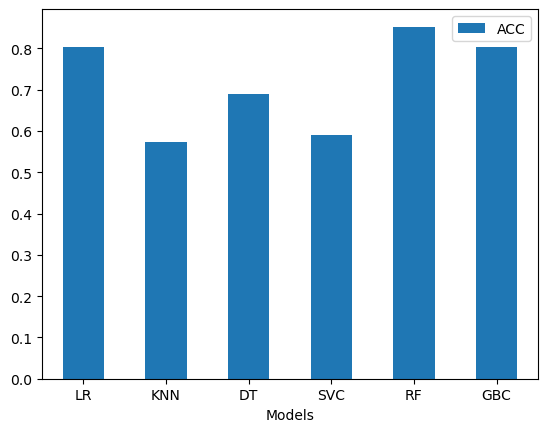

In [178]:
import matplotlib.pyplot as plt
final_model.plot.bar(x='Models', y='ACC', rot=0)

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [267]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

# Prediction on New Data

In [268]:
import pandas as pd
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])

In [269]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [270]:
pre=rf.predict(new_data)


# Saving Model Using Joblib

In [254]:
import joblib
joblib.dump(rf,'heart_prediction_model')

['heart_prediction_model']

In [255]:
model =joblib.load('heart_prediction_model')

In [256]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [ ]:
import tkinter as Tk
import joblib
from tkinter import Tk, Label
def entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('heart_prediction_model')
    result= model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    if result == 0:
        Label(root,text="No Disesase").grid(row=35,column=100)
    else:
        Label(root,text = "Possibility of Heart Diseases").grid(row=35,column=100)
root = Tk()
root.title('Heart Diasease Prediction')
Label(root,text="Enter Your Age").grid(row=1,columnspan=5)
Label(root,text="Male or Female(0/1)").grid(row=3,columnspan=5)
Label(root,text="Enter Your cp").grid(row=5,columnspan=5)
Label(root,text="Enter Your trestbps").grid(row=7,columnspan=5)
Label(root,text="Enter Your Cholestral ").grid(row=9,columnspan=5)
Label(root,text="Enter Your fbs ").grid(row=11,columnspan=5)
Label(root,text="Enter Your restecg").grid(row=13,columnspan=5)
Label(root,text="Enter Your thalach").grid(row=15,columnspan=5)
Label(root,text="Enter Your exang").grid(row=17,columnspan=5)
Label(root,text="Enter Your oldpeak").grid(row=19,columnspan=5)
Label(root,text="Enter Slope").grid(row=21,columnspan=5)
Label(root,text="Enter ca").grid(row=23,columnspan=5)
Label(root,text="Enter Thal").grid(row=25,columnspan=5)
e1=Entry(root)
e2=Entry(root)
e3=Entry(root)
e4=Entry(root)
e5=Entry(root)
e6=Entry(root)
e7=Entry(root)
e8=Entry(root)
e9=Entry(root)
e10=Entry(root)
e11=Entry(root)
e12=Entry(root)
e13=Entry(root)
e1.grid(row=1,column=100)
e2.grid(row=3,column=100)
e3.grid(row=5,column=100)
e4.grid(row=7,column=100)
e5.grid(row=9,column=100)
e6.grid(row=11,column=100)
e7.grid(row=13,column=100)
e8.grid(row=15,column=100)
e9.grid(row=17,column=100)
e10.grid(row=19,column=100)
e11.grid(row=21,column=100)
e12.grid(row=23,column=100)
e13.grid(row=25,column=100)
Button(root,text="predict",command=entry_fields).grid(row=27,column=50)

root.mainloop()

D:\sai\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data = pd.read_csv('CVD.csv')
df = pd.DataFrame(data)

In [ ]:
df.head()